# Preparação do ambiente

## Importando bibliotecas e bases

In [99]:
import pandas as pd
import numpy as np
import seaborn as sb
from unidecode import unidecode
import matplotlib.pyplot as plt

In [3]:
v = pd.read_csv("../../data/processed/V.csv")
v.drop(columns=["Unnamed: 0"], inplace=True)

v["passageiro_data_hora"] = pd.to_datetime(v["passageiro_data_hora"])
v["passageiro_hora_entrada"] = v["passageiro_data_hora"].dt.hour

In [4]:
fgr = pd.read_csv("../../data/processed/FGR.csv", decimal=",")
fgr.drop(columns=["Unnamed: 0"], inplace=True)

In [5]:
paradas = pd.read_csv("../../data/processed/paradas.csv")
rota_paradas = pd.read_csv("../../data/processed/rota_paradas.csv")
rotas = pd.read_csv("../../data/processed/rotas.csv")

In [6]:
dados_bairros = pd.read_csv("../../data/processed/dados_bairros.csv")

## Gerando variavel demanda diaria por linha

In [7]:
demanda_p_linha_dia = v.groupby(["linha_numero", "movimento_diario_data_mov"]).count()["passageiro_matricula"].to_frame().reset_index()
demanda_p_linha_dia.rename(columns={"passageiro_matricula": "demanda_do_dia"}, inplace = True)

In [8]:
demanda_p_linha_dia.head()

,linha_numero,movimento_diario_data_mov,demanda_do_dia
0,1,2021-08-29,232
1,1,2021-08-31,9096
2,1,2021-09-01,8888
3,1,2021-09-02,8244
4,1,2021-09-03,9020


# Analise Mono

## FGR

In [9]:
fgr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17530 entries, 0 to 17529
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   fechamento_data                  17530 non-null  object 
 1   empresa_numero                   17530 non-null  int64  
 2   empresa_nome                     17530 non-null  object 
 3   linha_numero                     17530 non-null  int64  
 4   linha_nome                       17530 non-null  object 
 5   linha_km_programado              17530 non-null  float64
 6   linha_km_adotado                 17530 non-null  float64
 7   linha_eficiencia                 17530 non-null  float64
 8   passageiro_grupo                 17530 non-null  object 
 9   passageiro_demanda               17530 non-null  int64  
 10  passageiro_arrecadacao           17530 non-null  float64
 11  passageiro_arrecadacao_prevista  17530 non-null  float64
dtypes: float64(5), int

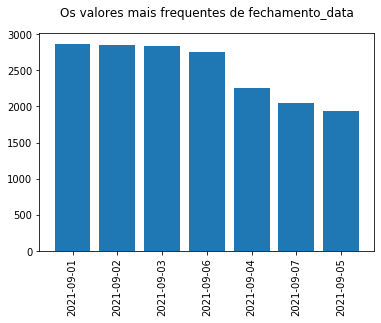

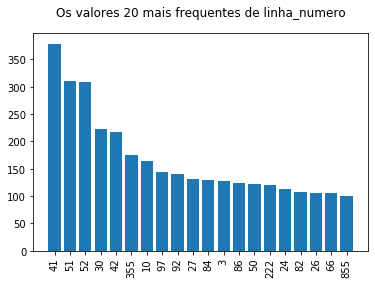

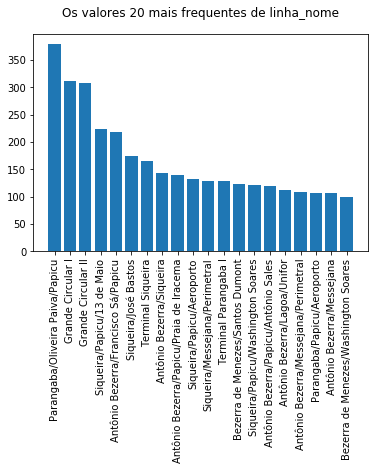

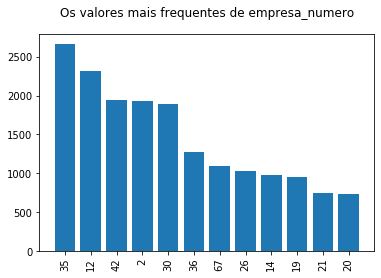

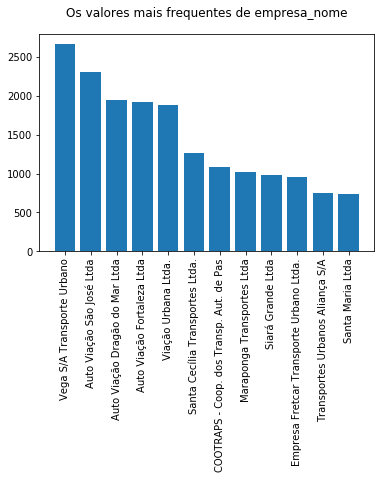

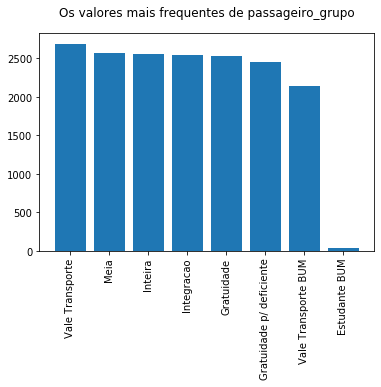

In [10]:
columns = ['fechamento_data', 'linha_numero', 'linha_nome', 'empresa_numero', 'empresa_nome', 'passageiro_grupo']

for i in columns:
  fig, ax = plt.subplots()
  if (i == 'linha_numero') | (i == 'linha_nome'):
    ax.bar(fgr[i].value_counts().index[:20].map(str), fgr[i].value_counts().values[:20], align='center')
    ttl = ax.set_title(f'Os valores 20 mais frequentes de {i}')
  else:
    ax.bar(fgr[i].value_counts().index[::].map(str), fgr[i].value_counts().values[::], align='center')
    ttl = ax.set_title(f'Os valores mais frequentes de {i}')
  ttl.set_position([.5, 1.05])
  plt.xticks(rotation=90)
  plt.plot()

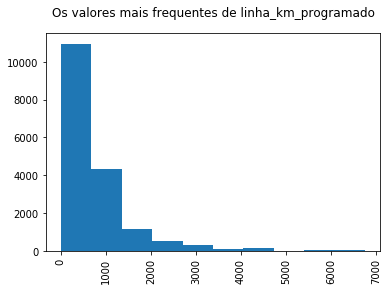

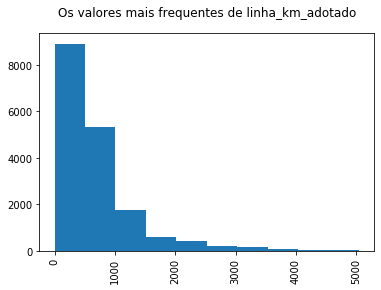

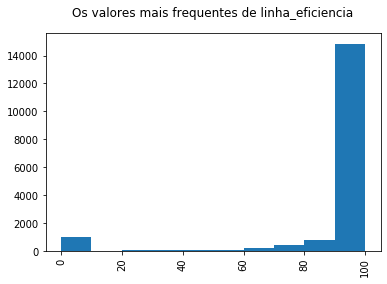

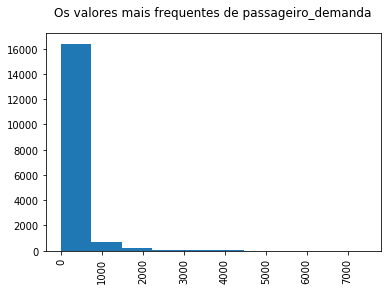

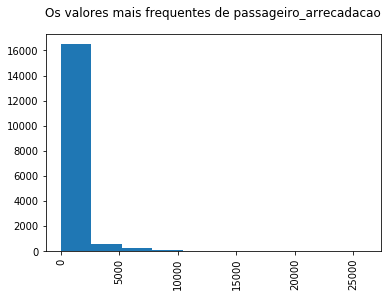

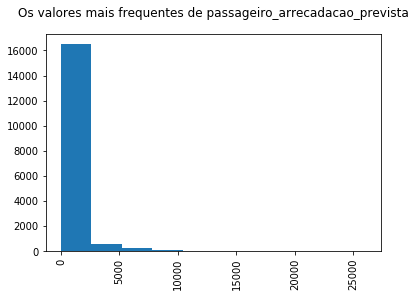

In [11]:
columns = fgr.drop(columns=columns).columns.to_list()
n_bins = 10

for i in columns:
    fig, ax = plt.subplots()
    ax.hist(fgr[i], n_bins)
    ttl = ax.set_title(f'Os valores mais frequentes de {i}')
    ttl.set_position([.5, 1.05])
    plt.xticks(rotation=90)
    plt.plot()

## V

In [12]:
v.columns

Index(['movimentos_data_arq', 'movimento_diario_data_mov', 'categoria_tipo',
       'empresa_codigo', 'empresa_modalidade', 'veiculo_numero',
       'veiculo_validador', 'linha_numero', 'linha_jornada',
       'linha_num_operador', 'linha_tabela', 'linha_hora_abertura',
       'linha_hora_fechamento', 'viagem_data_hora_abertura',
       'viagem_data_hora_fechamento', 'viagem_catraca_inicio',
       'viagem_catraca_final', 'viagem_sentido', 'viagem_ponto_abertura',
       'viagem_ponto_fechamento', 'passageiro_data_hora',
       'passageiro_integracao_bum', 'passageiro_valor_subsidio',
       'passageiro_evento', 'passageiro_sigben', 'passageiro_integracao',
       'passageiro_valor_pago', 'passageiro_tipo', 'passageiro_matricula',
       'passageiro_valor_repasse_metro', 'passageiro_hora_entrada'],
      dtype='object')

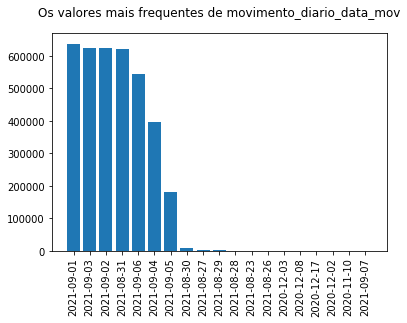

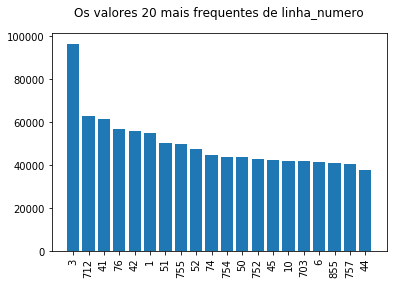

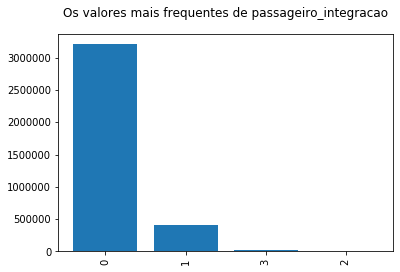

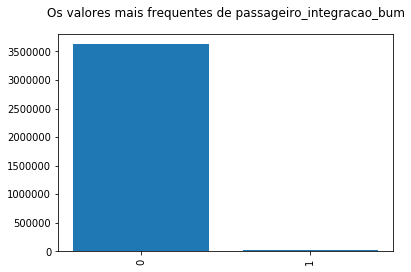

In [13]:
columns = ['movimento_diario_data_mov', 'linha_numero', 'passageiro_integracao', 'passageiro_integracao_bum']

for i in columns:
  fig, ax = plt.subplots()
  if (i == 'linha_numero') | (i == 'linha_nome'):
    ax.bar(v[i].value_counts().index[:20].map(str), v[i].value_counts().values[:20], align='center')
    ttl = ax.set_title(f'Os valores 20 mais frequentes de {i}')
  else:
    ax.bar(v[i].value_counts().index[::].map(str), v[i].value_counts().values[::], align='center')
    ttl = ax.set_title(f'Os valores mais frequentes de {i}')
  ttl.set_position([.5, 1.05])
  plt.xticks(rotation=90)
  plt.plot()

## dados_bairros

In [14]:
dados_bairros.columns

Index(['Bairros', 'IDH em 2010[8]', 'populaçao em 2020'], dtype='object')

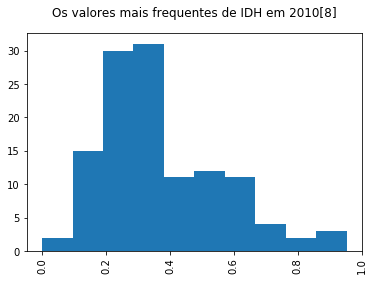

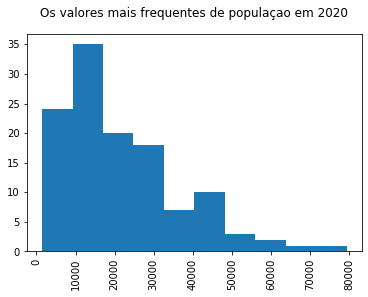

In [15]:
columns = ['IDH em 2010[8]', 'populaçao em 2020']
n_bins = 10

for i in columns:
    fig, ax = plt.subplots()
    ax.hist(dados_bairros[i], n_bins)
    ttl = ax.set_title(f'Os valores mais frequentes de {i}')
    ttl.set_position([.5, 1.05])
    plt.xticks(rotation=90)
    plt.plot()

# Validação Hipótese

## 1) O tamanho do trajeto se correlaciona positivamente com a demanda.

In [16]:
fgr.head()

,fechamento_data,empresa_numero,empresa_nome,linha_numero,linha_nome,linha_km_programado,linha_km_adotado,linha_eficiencia,passageiro_grupo,passageiro_demanda,passageiro_arrecadacao,passageiro_arrecadacao_prevista
0,2021-09-01,2,Auto Viação Fortaleza Ltda,4,Messejana/Papicu/Cambeba/TJ,1165.12,1147.14,98.46,Vale Transporte BUM,14,47.2,49.2
1,2021-09-01,2,Auto Viação Fortaleza Ltda,4,Messejana/Papicu/Cambeba/TJ,1165.12,1147.14,98.46,Gratuidade,27,0.0,0.0
2,2021-09-01,2,Auto Viação Fortaleza Ltda,4,Messejana/Papicu/Cambeba/TJ,1165.12,1147.14,98.46,Vale Transporte,1636,5654.4,5654.4
3,2021-09-01,2,Auto Viação Fortaleza Ltda,4,Messejana/Papicu/Cambeba/TJ,1165.12,1147.14,98.46,Gratuidade p/ deficiente,140,0.0,0.0
4,2021-09-01,2,Auto Viação Fortaleza Ltda,4,Messejana/Papicu/Cambeba/TJ,1165.12,1147.14,98.46,Meia,193,298.0,298.0


In [17]:
linha_p_km_programado = fgr[["fechamento_data", "linha_numero", "linha_km_programado"]].drop_duplicates()

In [18]:
linha_p_km_programado = linha_p_km_programado[linha_p_km_programado.linha_km_programado != 0]

In [19]:
linha_demanda_km = demanda_p_linha_dia.merge(
    linha_p_km_programado, how="inner", 
    left_on=["linha_numero", "movimento_diario_data_mov"], 
    right_on=["linha_numero","fechamento_data"]
)
linha_demanda_km.drop(columns=["fechamento_data"], inplace=True)
linha_demanda_km = linha_demanda_km.groupby(["linha_numero", "movimento_diario_data_mov"]).mean()

In [20]:
linha_demanda_km.reset_index().head()

,linha_numero,movimento_diario_data_mov,demanda_do_dia,linha_km_programado
0,4,2021-09-01,2410,1165.12
1,4,2021-09-02,2228,1165.12
2,4,2021-09-03,2291,1165.12
3,4,2021-09-06,1832,1165.12
4,11,2021-09-01,1567,578.16


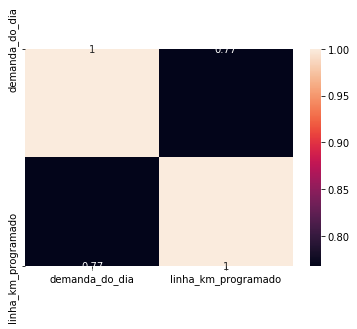

In [21]:
sb.heatmap(linha_demanda_km.corr(), annot=True)

#### Conclusão: O tamanho do trajeto se correlaciona positivamente com a demanda.

## 2) O tipo de passagem mais utilizada na linha influencia na demanda da mesma.

In [22]:
fgr.groupby(["linha_numero", "fechamento_data"]).max()["passageiro_grupo"].to_frame().reset_index().passageiro_grupo.value_counts()

Vale Transporte BUM    1670
Vale Transporte         304
Gratuidade                8
Name: passageiro_grupo, dtype: int64

In [23]:
linhas_max_tip_passageiro = fgr.groupby(["linha_numero", "fechamento_data"]).max()["passageiro_grupo"].to_frame().reset_index()

In [24]:
linha_demanda_tip_passageiro = demanda_p_linha_dia.merge(linhas_max_tip_passageiro, how="inner", left_on=["linha_numero", "movimento_diario_data_mov"], right_on=["linha_numero","fechamento_data"])
linha_demanda_tip_passageiro.drop(columns=["fechamento_data"], inplace = True)
linha_demanda_tip_passageiro.rename(columns={"passageiro_grupo": "tip_pass_mais_freq"}, inplace = True)

In [25]:
linha_demanda_tip_passageiro.head()

,linha_numero,movimento_diario_data_mov,demanda_do_dia,tip_pass_mais_freq
0,1,2021-09-01,8888,Vale Transporte BUM
1,1,2021-09-02,8244,Vale Transporte BUM
2,1,2021-09-03,9020,Vale Transporte BUM
3,1,2021-09-04,6572,Vale Transporte BUM
4,1,2021-09-05,4167,Vale Transporte BUM


In [26]:
linha_demanda_tip_passageiro.describe()

,linha_numero,demanda_do_dia
count,1730.000000,1730.000000
mean,382.506936,1736.750867
std,262.673196,1982.421598
min,1.000000,1.000000
25%,108.000000,502.000000
50%,357.000000,1070.000000
75%,631.000000,2095.250000
max,999.000000,15203.000000


Para remover os outliers de demanda_do_dia pelo intervalo interquaril, fazemos o seguinte calculo:

(2095 - 502)*1.5 + 2095 = Limite Superior = 4485

In [27]:
linha_demanda_tip_passageiro.query("demanda_do_dia <= 4485", inplace=True)

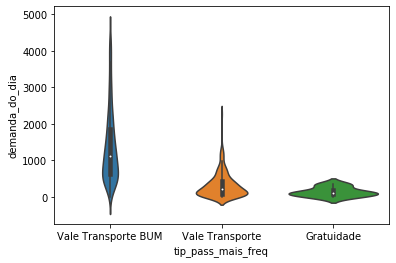

In [28]:
sb.violinplot(data=linha_demanda_tip_passageiro, x="tip_pass_mais_freq", y="demanda_do_dia");

#### Conclusão: Devido ao desbalanceamento, não podemos considerar o tipo de passageiro mais frequente como algo que se correlaciona com a demanda.

## 3) A demanda é maior entre os horários de 06h às 09h e 17h às 19h em comparação aos outros.

In [29]:
v.head()

,movimentos_data_arq,movimento_diario_data_mov,categoria_tipo,empresa_codigo,empresa_modalidade,veiculo_numero,veiculo_validador,linha_numero,linha_jornada,linha_num_operador,...,passageiro_integracao_bum,passageiro_valor_subsidio,passageiro_evento,passageiro_sigben,passageiro_integracao,passageiro_valor_pago,passageiro_tipo,passageiro_matricula,passageiro_valor_repasse_metro,passageiro_hora_entrada
0,2021-09-01,2021-08-26,1,42,1,42717,860E,633,1,196769,...,0,0,4219114872,0,0,3.6,4,7308696,0.0,5
1,2021-09-01,2021-08-26,1,42,1,42717,860E,633,1,196769,...,0,0,4219114873,0,0,3.6,4,6423497,0.0,5
2,2021-09-01,2021-08-26,1,42,1,42717,860E,633,1,196769,...,0,0,4219114874,0,0,3.6,12,5063339,0.0,5
3,2021-09-01,2021-08-26,1,42,1,42717,860E,633,1,196769,...,0,0,4219114875,0,0,3.6,4,4792159,0.0,5
4,2021-09-01,2021-08-26,1,42,1,42717,860E,633,1,196769,...,0,0,4219114876,0,0,3.6,4,3125993,0.0,5


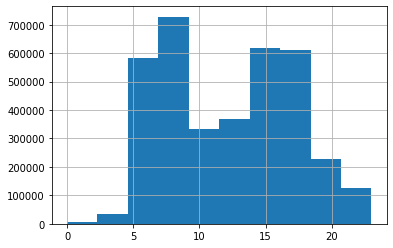

In [30]:
v["passageiro_hora_entrada"].hist()

In [31]:
v.passageiro_data_hora.describe()

/home/gabriel/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                 3641303
unique                 486947
top       2021-09-02 06:25:39
freq                       38
first     2020-11-10 06:47:59
last      2021-09-07 01:03:11
Name: passageiro_data_hora, dtype: object

In [32]:
v["passageiro_data_hora"].head()

0   2021-08-26 05:37:51
1   2021-08-26 05:40:11
2   2021-08-26 05:40:16
3   2021-08-26 05:41:06
4   2021-08-26 05:42:21
Name: passageiro_data_hora, dtype: datetime64[ns]

In [33]:
v["passageiro_hora_entrada"] = v["passageiro_data_hora"].dt.hour

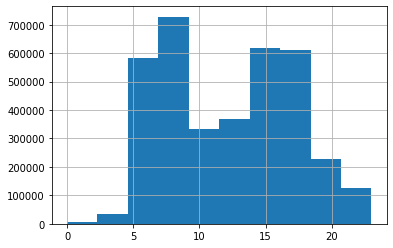

In [34]:
v["passageiro_hora_entrada"].hist()

Agrupando os horarios em ranges:

In [35]:
v["passageiro_hora_range"] = pd.cut(v["passageiro_hora_entrada"], bins=[-1, 4, 6, 9, 12, 15, 18, 21, float('Inf')], labels=['00-3h59', '4-5h59', '6-8h59', '9-11h59', '12-14h59', '15-17h59', '18-20h59', '21-23h59'])

In [36]:
v["passageiro_hora_range"].value_counts()

15-17h59    869222
6-8h59      728089
4-5h59      584428
12-14h59    534716
9-11h59     527937
18-20h59    285469
21-23h59     69756
00-3h59      41686
Name: passageiro_hora_range, dtype: int64

In [37]:
v["passageiro_hora_range"].isnull().sum()

0

In [38]:
v.head()

,movimentos_data_arq,movimento_diario_data_mov,categoria_tipo,empresa_codigo,empresa_modalidade,veiculo_numero,veiculo_validador,linha_numero,linha_jornada,linha_num_operador,...,passageiro_valor_subsidio,passageiro_evento,passageiro_sigben,passageiro_integracao,passageiro_valor_pago,passageiro_tipo,passageiro_matricula,passageiro_valor_repasse_metro,passageiro_hora_entrada,passageiro_hora_range
0,2021-09-01,2021-08-26,1,42,1,42717,860E,633,1,196769,...,0,4219114872,0,0,3.6,4,7308696,0.0,5,4-5h59
1,2021-09-01,2021-08-26,1,42,1,42717,860E,633,1,196769,...,0,4219114873,0,0,3.6,4,6423497,0.0,5,4-5h59
2,2021-09-01,2021-08-26,1,42,1,42717,860E,633,1,196769,...,0,4219114874,0,0,3.6,12,5063339,0.0,5,4-5h59
3,2021-09-01,2021-08-26,1,42,1,42717,860E,633,1,196769,...,0,4219114875,0,0,3.6,4,4792159,0.0,5,4-5h59
4,2021-09-01,2021-08-26,1,42,1,42717,860E,633,1,196769,...,0,4219114876,0,0,3.6,4,3125993,0.0,5,4-5h59


In [39]:
v_hora_range = v.groupby(["linha_numero", "movimento_diario_data_mov", "passageiro_hora_range"]).count()["passageiro_matricula"].to_frame().reset_index()

In [40]:
v_hora_range.dropna(inplace=True)

In [41]:
v_hora_range.head()

,linha_numero,movimento_diario_data_mov,passageiro_hora_range,passageiro_matricula
73,1,2021-08-29,4-5h59,4.0
74,1,2021-08-29,6-8h59,74.0
75,1,2021-08-29,9-11h59,97.0
76,1,2021-08-29,12-14h59,57.0
88,1,2021-08-31,00-3h59,150.0


In [42]:
import plotly.express as px

fig = px.violin(v_hora_range, y="passageiro_matricula", x="passageiro_hora_range", box=True,
          hover_data=v_hora_range.columns)
fig.show()

**00h - 3h59**

75%  das rotas tiverem até  43 pessoas

25%  das rotas tiverem até  5 pessoas

---
**4h-5h59**

75%  das rotas tiverem até  415 pessoas

25%  das rotas tiverem até  100 pessoas

---
**06h - 8h59**

75%  das rotas tiverem até  451 pessoas

25%  das rotas tiverem até  126 pessoas

---
**09h - 11h59**

75%  das rotas tiverem até  342 pessoas

25%  das rotas tiverem até  96 pessoas

---
**12h - 14h59**

75%  das rotas tiverem até  332 pessoas

25%  das rotas tiverem até  76 pessoas

---
**15h - 17h59**

75%  das rotas tiverem até  516 pessoas

25%  das rotas tiverem até  112 pessoas

---
**18 - 20h59**

75%  das rotas tiverem até  164 pessoas

25%  das rotas tiverem até  33 pessoas

---
**21 - 23h59**

75%  das rotas tiverem até  40 pessoas

25%  das rotas tiverem até  7 pessoas



In [43]:
v_hora_range_dummies = pd.get_dummies(v_hora_range["passageiro_hora_range"])

In [44]:
v_hora_range = pd.concat([v_hora_range, v_hora_range_dummies], axis=1)

In [45]:
v_hora_range.head(20)

,linha_numero,movimento_diario_data_mov,passageiro_hora_range,passageiro_matricula,00-3h59,4-5h59,6-8h59,9-11h59,12-14h59,15-17h59,18-20h59,21-23h59
73,1,2021-08-29,4-5h59,4.0,0,1,0,0,0,0,0,0
74,1,2021-08-29,6-8h59,74.0,0,0,1,0,0,0,0,0
75,1,2021-08-29,9-11h59,97.0,0,0,0,1,0,0,0,0
76,1,2021-08-29,12-14h59,57.0,0,0,0,0,1,0,0,0
88,1,2021-08-31,00-3h59,150.0,1,0,0,0,0,0,0,0
89,1,2021-08-31,4-5h59,1871.0,0,1,0,0,0,0,0,0
90,1,2021-08-31,6-8h59,1680.0,0,0,1,0,0,0,0,0
91,1,2021-08-31,9-11h59,1252.0,0,0,0,1,0,0,0,0
92,1,2021-08-31,12-14h59,1236.0,0,0,0,0,1,0,0,0
93,1,2021-08-31,15-17h59,2083.0,0,0,0,0,0,1,0,0


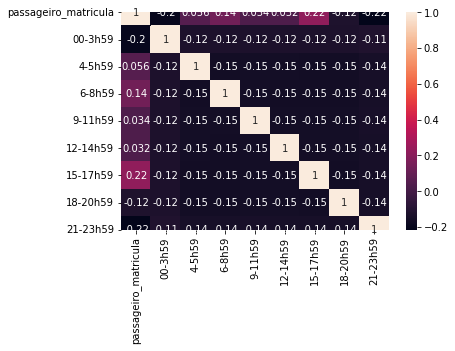

In [46]:
sb.heatmap(v_hora_range.drop(columns=["linha_numero"]).corr(), annot=True)

#### Conclusão
Existe uma certa correlação entre horário e a demanda. Notamos que horário entre 06h - 8h59 e 15h - 17h59 possuem uma demanda maior do que os outros horários. As menores demandas se encontram em horário noturno (após as 18h).

Existe uma certa demanda pela madrugada, provavelmente pelas pessoas que moram na região metropolitana ou muito distante de onde trabalham (o que necessita estas pegarem onibus mais cedo).

## 4) O IDH / População dos bairros em que a linha se correlaciona com a demanda da mesma.

### Conectando info de bairros

In [47]:
rota_paradas_merged = rota_paradas.merge(paradas, how="inner", on="stop_id")
rota_paradas_merged = rota_paradas_merged.merge(rotas, how="inner", on="route_id")

In [48]:
#Retirando colunad desnecessaria
rotas_paradas_clean = rota_paradas_merged[["route_id", "stop_sequence", "district", "city"]]

In [49]:
rotas_paradas_clean.head()

,route_id,stop_sequence,district,city
0,11,1,Centro,Fortaleza
1,11,2,Centro,Fortaleza
2,11,3,Centro,Fortaleza
3,11,4,Jacarecanga,Fortaleza
4,11,5,Centro,Fortaleza


In [50]:
rotas_paradas_clean.district.value_counts()

Centro                        383
Messejana                     336
Parangaba                     295
Barra do Ceará                225
Fátima                        202
                             ... 
Urucutuba                       4
Industrial                      3
Ellery                          2
Cararu                          2
Rodovia Estrada do Guarani      1
Name: district, Length: 130, dtype: int64

In [51]:
rotas_paradas_demanda = rotas_paradas_clean.merge(demanda_p_linha_dia, how="inner", left_on="route_id", right_on="linha_numero")

In [52]:
rotas_paradas_demanda.drop(columns=["route_id", "stop_sequence"], inplace=True)

In [53]:
rotas_paradas_demanda.head()

,district,city,linha_numero,movimento_diario_data_mov,demanda_do_dia
0,Centro,Fortaleza,11,2021-08-31,1561
1,Centro,Fortaleza,11,2021-09-01,1567
2,Centro,Fortaleza,11,2021-09-02,1683
3,Centro,Fortaleza,11,2021-09-03,1739
4,Centro,Fortaleza,11,2021-09-04,814


In [54]:
rotas_paradas_demanda = rotas_paradas_demanda[rotas_paradas_demanda["city"] == "Fortaleza"]

In [55]:
rotas_paradas_demanda.head()

,district,city,linha_numero,movimento_diario_data_mov,demanda_do_dia
0,Centro,Fortaleza,11,2021-08-31,1561
1,Centro,Fortaleza,11,2021-09-01,1567
2,Centro,Fortaleza,11,2021-09-02,1683
3,Centro,Fortaleza,11,2021-09-03,1739
4,Centro,Fortaleza,11,2021-09-04,814


In [56]:
rotas_paradas_demanda.district.unique()

array(['Centro', 'Jacarecanga', 'Farias Brito', 'Benfica', 'Fátima',
       'São João do Tauape', 'Dionísio Torres', 'Aldeota', 'Papicu',
       'Varjota', 'Meireles', 'Carlito Pamplona', 'Barra do Ceará',
       'Álvaro Weyne', 'Floresta', 'Vila Velha', 'Jardim Guanabara',
       'Olavo Oliveira', 'Antônio Bezerra', 'Padre Andrade',
       'Conjunto Ceará I', 'Genibaú', 'Autran Nunes', 'Dom Lustosa',
       'Henrique Jorge', 'Jóquei Clube', 'Demócrito Rocha',
       'Couto Fernandes', 'Bela Vista', 'Rodolfo Teófilo',
       'Cristo Redentor', 'Granja Lisboa', 'Conjunto Ceará II', 'Pirambu',
       'Cocó', 'Presidente Kennedy', 'Cidade 2000',
       'Engenheiro Luciano Cavalcante', 'Salinas', 'Guararapes',
       'José Bonifácio', 'Săo Gerardo', 'Monte Castelo', 'Joaquim Távora',
       'Edson Queiroz', 'Pici', 'Amadeu Furtado', 'Parquelândia',
       'Parque Araxá', 'Parreão', 'Vila Uniăo', 'Parque Manibura',
       'José de Alencar', 'Lagoa Redonda', 'Curió', 'Cambeba', 'Guajeru',
  

### Resolvendo problemas de merge entre dados_bairro e rotas_paradas_demanda

In [57]:
# Retira acentos e barras (/ + termo) dos nomes dos bairros
district = []
for index, row in rotas_paradas_demanda.iterrows():
  district_without_punt = unidecode(row["district"])
  district_without_barra = district_without_punt.split("/")[0]
  if district_without_barra.startswith("Parque "):
    district_without_barra = district_without_barra.replace("Parque ", "")
  if district_without_barra.startswith("Vila "):
    district_without_barra = district_without_barra.replace("Vila ", "")
  if district_without_barra.startswith("Prefeito "):
    district_without_barra = district_without_barra.replace("Prefeito ", "")
  district.append(district_without_barra.strip())
rotas_paradas_demanda["Bairro"] = district

district = []
for index, row in dados_bairros.iterrows():
  district_without_punt = unidecode(row["Bairros"])
  district_without_barra = district_without_punt.split("/")[0]
  if district_without_barra.startswith("Parque "):
    district_without_barra = district_without_barra.replace("Parque ", "")
  if district_without_barra.startswith("Vila "):
    district_without_barra = district_without_barra.replace("Vila ", "")
  if district_without_barra.startswith("Prefeito "):
    district_without_barra = district_without_barra.replace("Prefeito ", "")
  district.append(district_without_barra.strip())
dados_bairros["Bairro"] = district

In [58]:
dados_bairros["Bairro"].sort_values().unique()

array(['Aerolandia', 'Aeroporto', 'Aldeota', 'Alto da Balanca',
       'Alvaro Weyne', 'Amadeu Furtado', 'Ancuri', 'Antonio Bezerra',
       'Aracape', 'Araxa', 'Autran Nunes', 'Barra do Ceara', 'Barroso',
       'Bela Vista', 'Benfica', 'Boa Vista', 'Bom Futuro', 'Bom Jardim',
       'Bonsucesso', 'Cais do Porto', 'Cajazeiras', 'Cambeba',
       'Canindezinho', 'Carlito Pamplona', 'Centro', 'Cidade 2000',
       'Cidade dos Funcionarios', 'Coacu', 'Coco', 'Conjunto Ceara I',
       'Conjunto Ceara II', 'Conjunto Esperanca', 'Conjunto Palmeiras',
       'Couto Fernandes', 'Cristo Redentor', 'Curio', 'Damas',
       'De Lourdes', 'Democrito Rocha', 'Dende', 'Dias Macedo',
       'Dionisio Torres', 'Dois Irmaos', 'Dom Lustosa', 'Edson Queiroz',
       'Ellery', 'Engenheiro Luciano Cavalcante', 'Farias Brito',
       'Fatima', 'Floresta', 'Genibau', 'Granja Lisboa',
       'Granja Portugal', 'Guajeru', 'Guararapes', 'Henrique Jorge',
       'Iracema', 'Itaoca', 'Itaperi', 'Jacarecanga', '

In [59]:
rotas_paradas_demanda["Bairro"] = rotas_paradas_demanda["Bairro"].str.lower()
rotas_paradas_demanda["Bairro"] = rotas_paradas_demanda["Bairro"].str.replace("ç", "c")
dados_bairros["Bairro"] = dados_bairros["Bairro"].str.lower()

In [60]:
rotas_paradas_demanda.Bairro.unique()

array(['centro', 'jacarecanga', 'farias brito', 'benfica', 'fatima',
       'sao joao do tauape', 'dionisio torres', 'aldeota', 'papicu',
       'varjota', 'meireles', 'carlito pamplona', 'barra do ceara',
       'alvaro weyne', 'floresta', 'velha', 'jardim guanabara',
       'olavo oliveira', 'antonio bezerra', 'padre andrade',
       'conjunto ceara i', 'genibau', 'autran nunes', 'dom lustosa',
       'henrique jorge', 'joquei clube', 'democrito rocha',
       'couto fernandes', 'bela vista', 'rodolfo teofilo',
       'cristo redentor', 'granja lisboa', 'conjunto ceara ii', 'pirambu',
       'coco', 'presidente kennedy', 'cidade 2000',
       'engenheiro luciano cavalcante', 'salinas', 'guararapes',
       'jose bonifacio', 'sao gerardo', 'monte castelo', 'joaquim tavora',
       'edson queiroz', 'pici', 'amadeu furtado', 'parquelandia', 'araxa',
       'parreao', 'uniao', 'manibura', 'jose de alencar', 'lagoa redonda',
       'curio', 'cambeba', 'guajeru', 'parangaba', 'montese', 'd

In [61]:
dados_bairros.head()

,Bairros,IDH em 2010[8],populaçao em 2020,Bairro
0,Aerolandia,0.311,12445,aerolandia
1,Aeroporto,0.177,9442,aeroporto
2,Aldeota,0.867,46411,aldeota
3,Alto da Balança,0.347,14039,alto da balanca
4,Alvaro Weyne,0.365,25955,alvaro weyne


In [62]:
rotas_demanda_bairro = rotas_paradas_demanda.merge(dados_bairros, how="inner", left_on="Bairro", right_on="Bairro")

In [63]:
rotas_demanda_bairro.head()

,district,city,linha_numero,movimento_diario_data_mov,demanda_do_dia,Bairro,Bairros,IDH em 2010[8],populaçao em 2020
0,Centro,Fortaleza,11,2021-08-31,1561,centro,Centro,0.557,31268
1,Centro,Fortaleza,11,2021-09-01,1567,centro,Centro,0.557,31268
2,Centro,Fortaleza,11,2021-09-02,1683,centro,Centro,0.557,31268
3,Centro,Fortaleza,11,2021-09-03,1739,centro,Centro,0.557,31268
4,Centro,Fortaleza,11,2021-09-04,814,centro,Centro,0.557,31268


### Verificando a hipótese

In [64]:
rotas_demanda_bairro.groupby(["linha_numero"]).mean()[["demanda_do_dia", "IDH em 2010[8]"]].corr()

,demanda_do_dia,IDH em 2010[8]
demanda_do_dia,1.000000,0.246655
IDH em 2010[8],0.246655,1.000000


In [65]:
rotas_demanda_bairro.groupby(["linha_numero"]).mean()[["demanda_do_dia", "populaçao em 2020"]].corr()

,demanda_do_dia,populaçao em 2020
demanda_do_dia,1.000000,0.107566
populaçao em 2020,0.107566,1.000000


In [66]:
rotas_demanda_bairro.head()

,district,city,linha_numero,movimento_diario_data_mov,demanda_do_dia,Bairro,Bairros,IDH em 2010[8],populaçao em 2020
0,Centro,Fortaleza,11,2021-08-31,1561,centro,Centro,0.557,31268
1,Centro,Fortaleza,11,2021-09-01,1567,centro,Centro,0.557,31268
2,Centro,Fortaleza,11,2021-09-02,1683,centro,Centro,0.557,31268
3,Centro,Fortaleza,11,2021-09-03,1739,centro,Centro,0.557,31268
4,Centro,Fortaleza,11,2021-09-04,814,centro,Centro,0.557,31268


In [67]:
rotas_demanda = rotas_demanda_bairro.groupby(["linha_numero"]).mean()[["demanda_do_dia"]].reset_index()

In [68]:
rotas_idh_max = rotas_demanda_bairro.groupby(["linha_numero"]).max()[["IDH em 2010[8]"]].reset_index()

In [69]:
rotas_demanda.merge(rotas_idh_max, how="inner").corr()

,linha_numero,demanda_do_dia,IDH em 2010[8]
linha_numero,1.000000,-0.123162,-0.080735
demanda_do_dia,-0.123162,1.000000,0.468745
IDH em 2010[8],-0.080735,0.468745,1.000000


Aparentemente, a média do IDH dos bairros em que a rota passa e o maior IDH por onde ele passa tem leve correlação positiva com a demanda.

In [70]:
dados_bairros.describe()

,IDH em 2010[8],populaçao em 2020
count,121.000000,121.000000
mean,0.372116,22203.363636
std,0.184099,15102.332438
min,0.000000,1470.000000
25%,0.243000,11744.000000
50%,0.338000,17533.000000
75%,0.491000,30237.000000
max,0.953000,79346.000000


## 5) Dias da semana afetam a demanda?

In [71]:
demanda_p_linha_dia.movimento_diario_data_mov = pd.to_datetime(demanda_p_linha_dia.movimento_diario_data_mov)

In [72]:
demanda_p_linha_dia["Dia_Semana"] = demanda_p_linha_dia.movimento_diario_data_mov.dt.weekday

In [73]:
days_week ={
    0: 'Segunda', 
    1: 'Terça', 
    2: 'Quarta', 
    3: 'Quinta', 
    4: 'Sexta',
    5: 'Sábado', 
    6: 'Domingo'
}

In [74]:
demanda_p_linha_dia.Dia_Semana = demanda_p_linha_dia.Dia_Semana.map(days_week)

In [75]:
demanda_semana_linha = demanda_p_linha_dia.groupby(["linha_numero", "Dia_Semana"]).mean()[["demanda_do_dia"]].reset_index()

In [98]:
demanda_semana_linha.head(60)

,linha_numero,demanda_do_dia,Domingo,Quarta,Quinta,Segunda,Sexta,Sábado,Terça
0,1,2199.5,1,0,0,0,0,0,0
1,1,8888.0,0,1,0,0,0,0,0
2,1,8244.0,0,0,1,0,0,0,0
3,1,8765.0,0,0,0,1,0,0,0
4,1,9020.0,0,0,0,0,1,0,0
5,1,6572.0,0,0,0,0,0,1,0
6,1,9096.0,0,0,0,0,0,0,1
7,3,5987.0,1,0,0,0,0,0,0
8,3,14999.0,0,1,0,0,0,0,0
9,3,14484.0,0,0,1,0,0,0,0


In [77]:
demanda_semana_linha = pd.concat([demanda_semana_linha, pd.get_dummies(demanda_semana_linha["Dia_Semana"])], axis = 1)

In [78]:
demanda_semana_linha.head()

,linha_numero,Dia_Semana,demanda_do_dia,Domingo,Quarta,Quinta,Segunda,Sexta,Sábado,Terça
0,1,Domingo,2199.5,1,0,0,0,0,0,0
1,1,Quarta,8888.0,0,1,0,0,0,0,0
2,1,Quinta,8244.0,0,0,1,0,0,0,0
3,1,Segunda,8765.0,0,0,0,1,0,0,0
4,1,Sexta,9020.0,0,0,0,0,1,0,0


In [79]:
demanda_semana_linha.drop(columns=["Dia_Semana"], inplace = True)

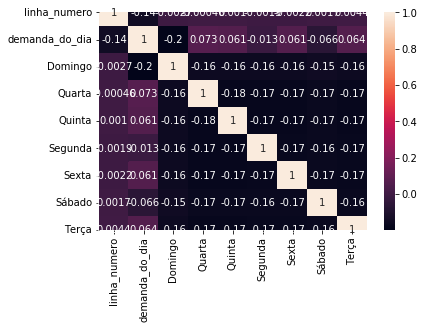

In [80]:
sb.heatmap(demanda_semana_linha.corr(), annot=True)

#### Conclusão: Aparentemente, apenas Domingo possui uma correlação consideravel com a demanda. Os outros dias não esboçam alguma correlação.

# Obsevando correlação para uma base unificada

In [81]:
demanda_por_linha_dia = v.groupby(["linha_numero", "movimento_diario_data_mov"]).count()["passageiro_matricula"].to_frame().reset_index()
demanda_por_linha_dia.rename(columns={"passageiro_matricula": "demanda_do_dia"}, inplace = True)

In [82]:
# Demanda por intervalor de tempo
v_por_hora_range = v.groupby(["linha_numero", "movimento_diario_data_mov", "passageiro_hora_range"]).count()["passageiro_matricula"].to_frame().reset_index()
v_por_hora_range.dropna(inplace=True)

In [83]:
days_week ={
    0: 'Segunda', 
    1: 'Terça', 
    2: 'Quarta', 
    3: 'Quinta', 
    4: 'Sexta',
    5: 'Sábado', 
    6: 'Domingo'
}

v_hora_range["movimento_diario_data_mov"] = pd.to_datetime(v_hora_range["movimento_diario_data_mov"])

def eh_domingo(dia_semana):
    if dia_semana == "Domingo":
        return 1
    else:
        return 0

v_hora_range["Dia_Semana"] = v_hora_range.movimento_diario_data_mov.dt.weekday
v_hora_range["Dia_Semana"] = v_hora_range.Dia_Semana.map(days_week)
v_hora_range["Domingo"] = v_hora_range["Dia_Semana"].map(eh_domingo)

In [84]:
dataset_model = v_hora_range.merge(linha_demanda_km, how="inner", on="linha_numero")
dataset_model = dataset_model.merge(rotas_idh_max, how="inner", on="linha_numero")

In [96]:
dataset_model.head()

,linha_numero,movimento_diario_data_mov,passageiro_hora_range,passageiro_matricula,00-3h59,4-5h59,6-8h59,9-11h59,12-14h59,15-17h59,18-20h59,21-23h59,Dia_Semana,Domingo,demanda_do_dia,linha_km_programado,IDH em 2010[8]
0,4,2021-08-31,6-8h59,319.0,0,0,1,0,0,0,0,0,Terça,0,2410,1165.12,0.762
1,4,2021-08-31,6-8h59,319.0,0,0,1,0,0,0,0,0,Terça,0,2228,1165.12,0.762
2,4,2021-08-31,6-8h59,319.0,0,0,1,0,0,0,0,0,Terça,0,2291,1165.12,0.762
3,4,2021-08-31,6-8h59,319.0,0,0,1,0,0,0,0,0,Terça,0,1832,1165.12,0.762
4,4,2021-08-31,9-11h59,398.0,0,0,0,1,0,0,0,0,Terça,0,2410,1165.12,0.762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71909,920,2021-09-06,21-23h59,36.0,0,0,0,0,0,0,0,1,Segunda,0,2461,946.62,0.530
71910,920,2021-09-06,21-23h59,36.0,0,0,0,0,0,0,0,1,Segunda,0,2664,1113.35,0.530
71911,920,2021-09-06,21-23h59,36.0,0,0,0,0,0,0,0,1,Segunda,0,2476,1621.72,0.530
71912,920,2021-09-06,21-23h59,36.0,0,0,0,0,0,0,0,1,Segunda,0,2350,1333.06,0.530


## Testes em que eu não sei o q to fzndo

(14.0, 0.0)

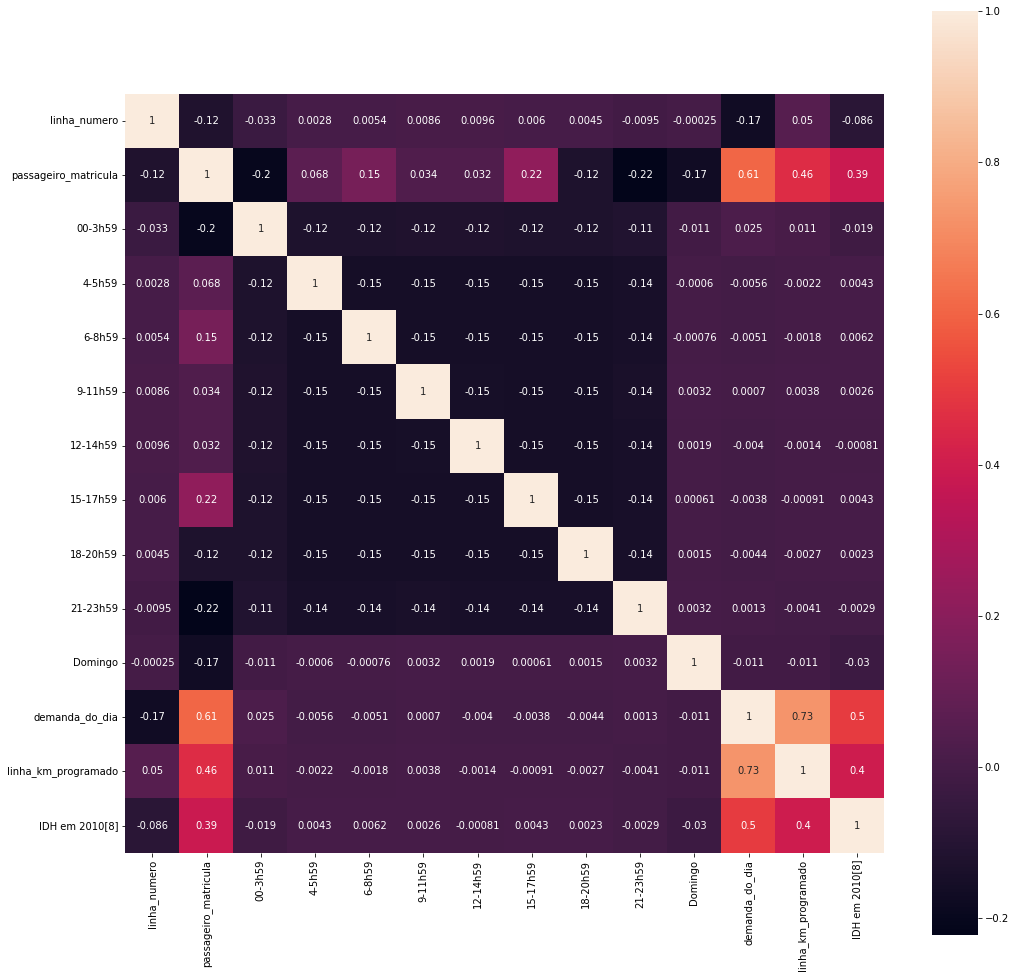

In [86]:
corrMatrix = dataset_model.corr()
f, ax = plt.subplots(figsize=(17, 17))
ax = sb.heatmap(corrMatrix, annot=True, square=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

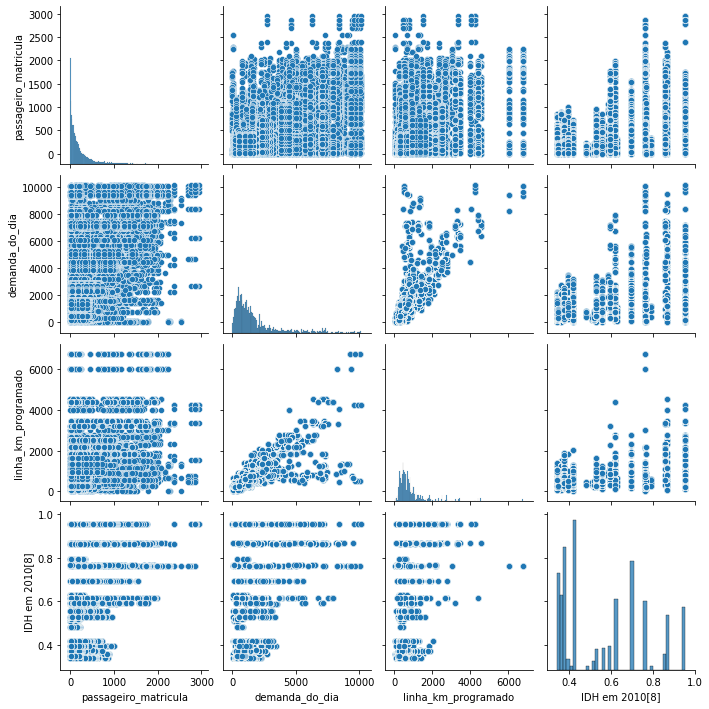

In [87]:
sb.pairplot(dataset_model[["passageiro_matricula", "demanda_do_dia", "linha_km_programado", "IDH em 2010[8]"]])

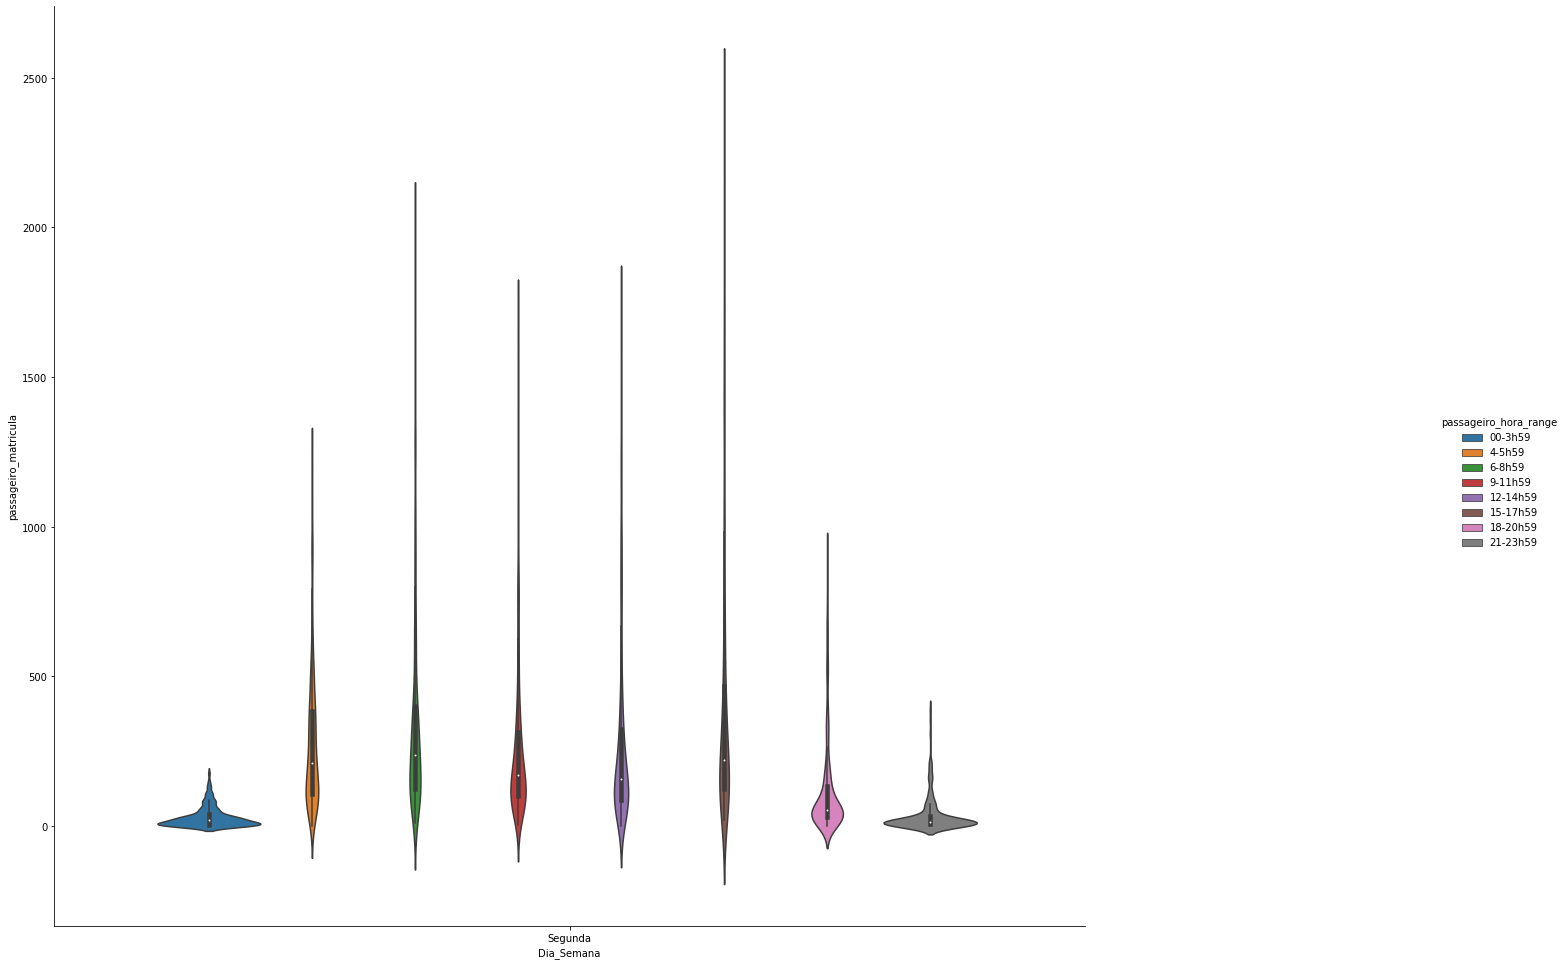

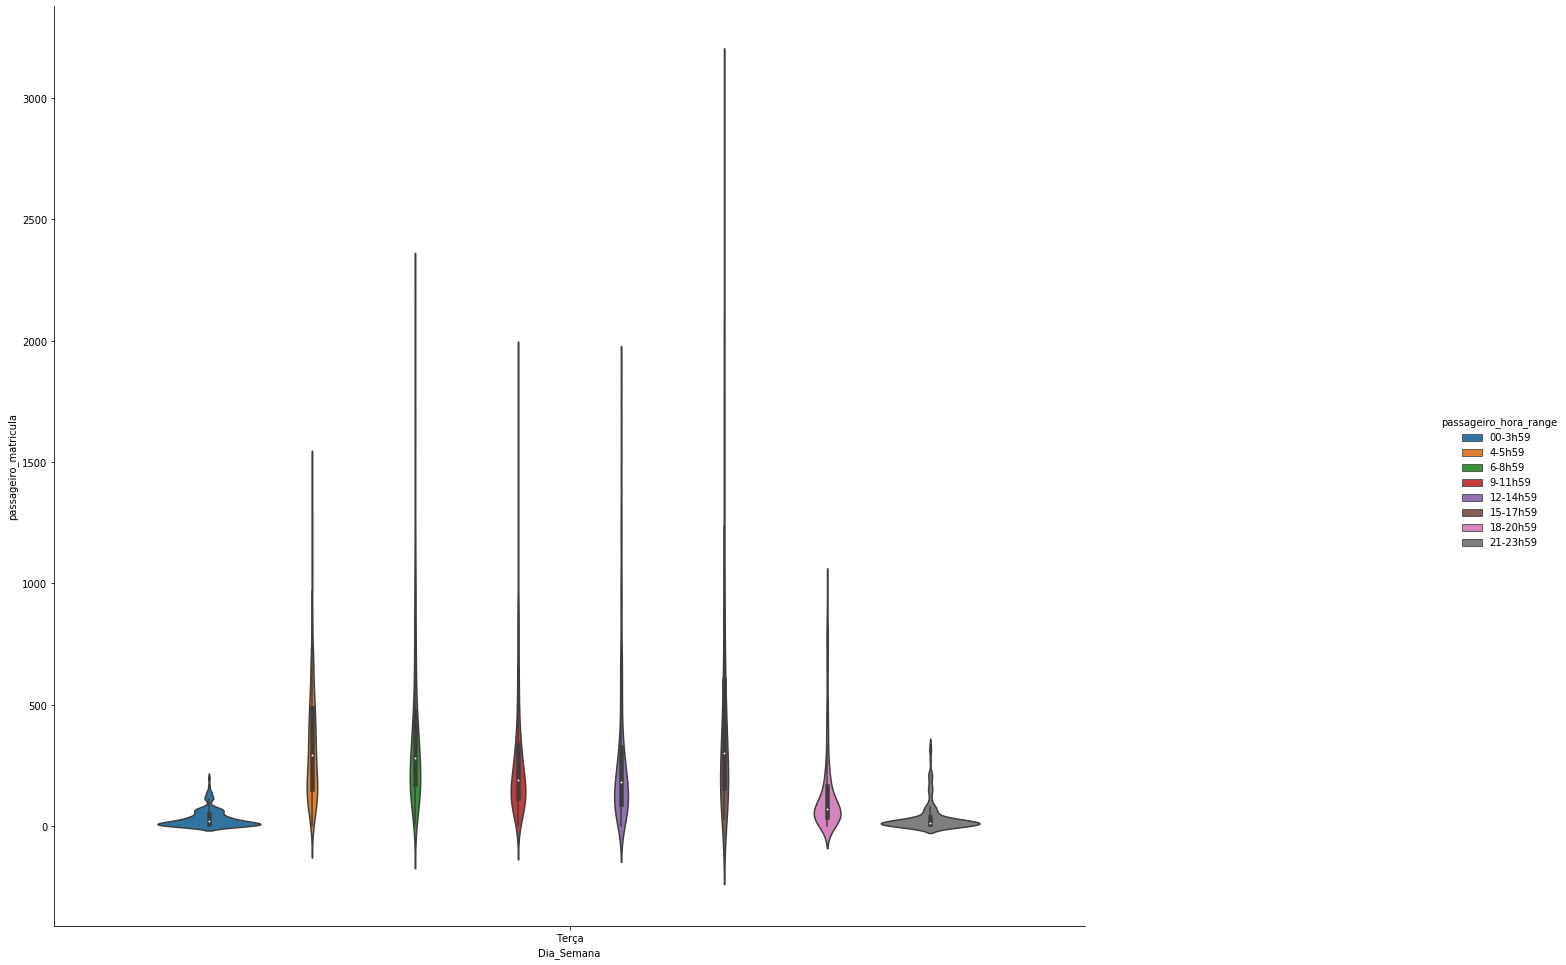

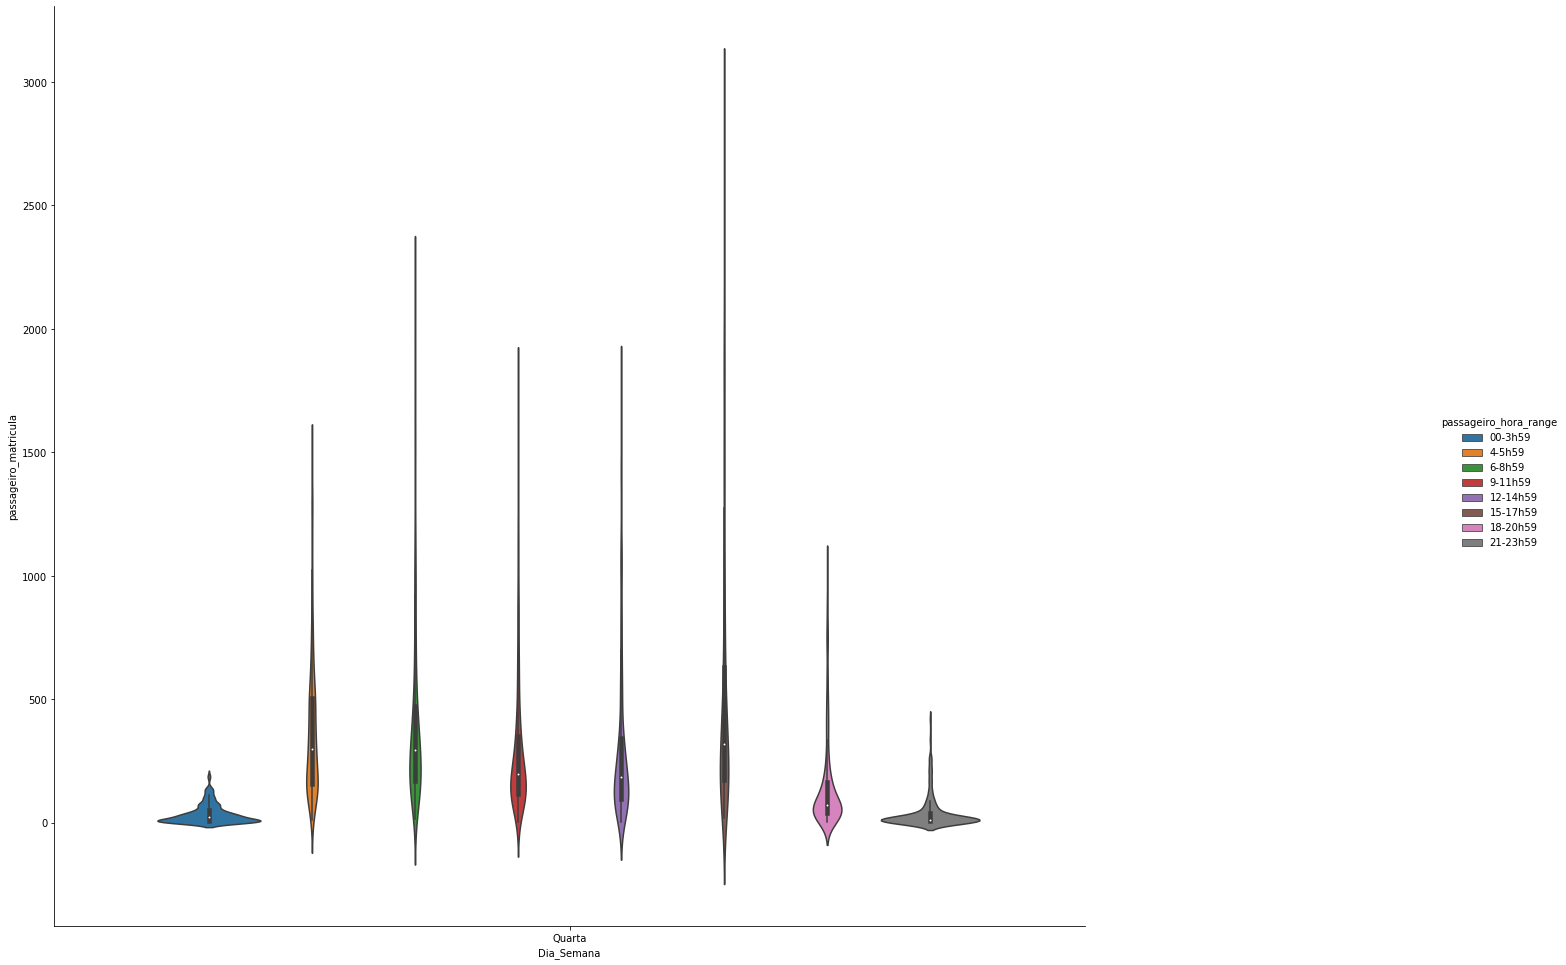

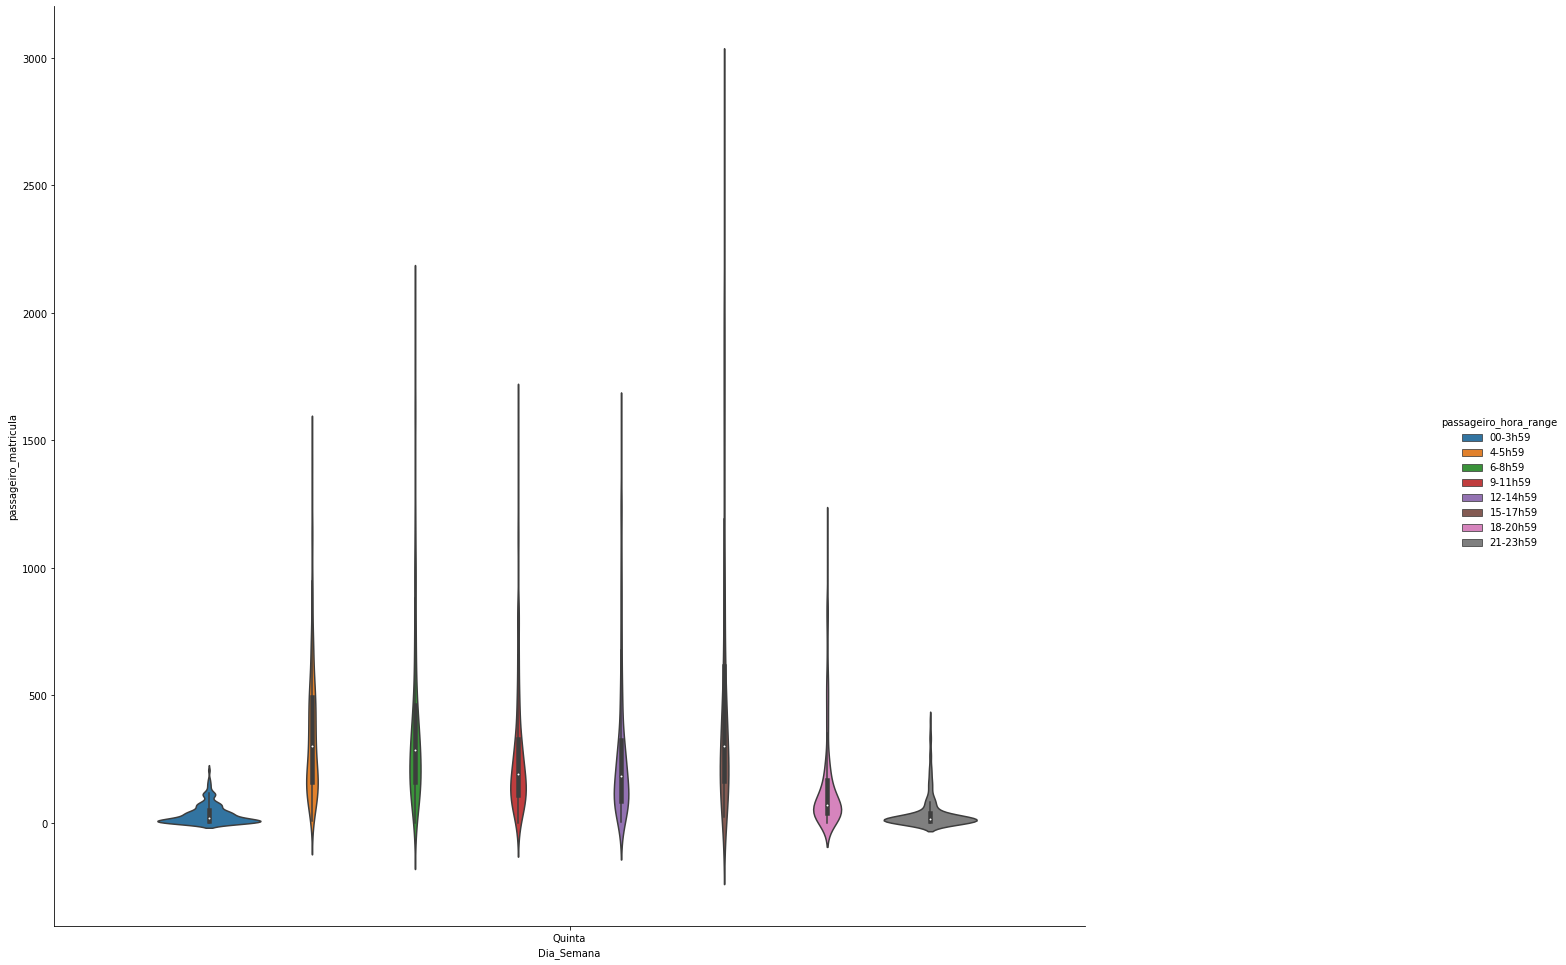

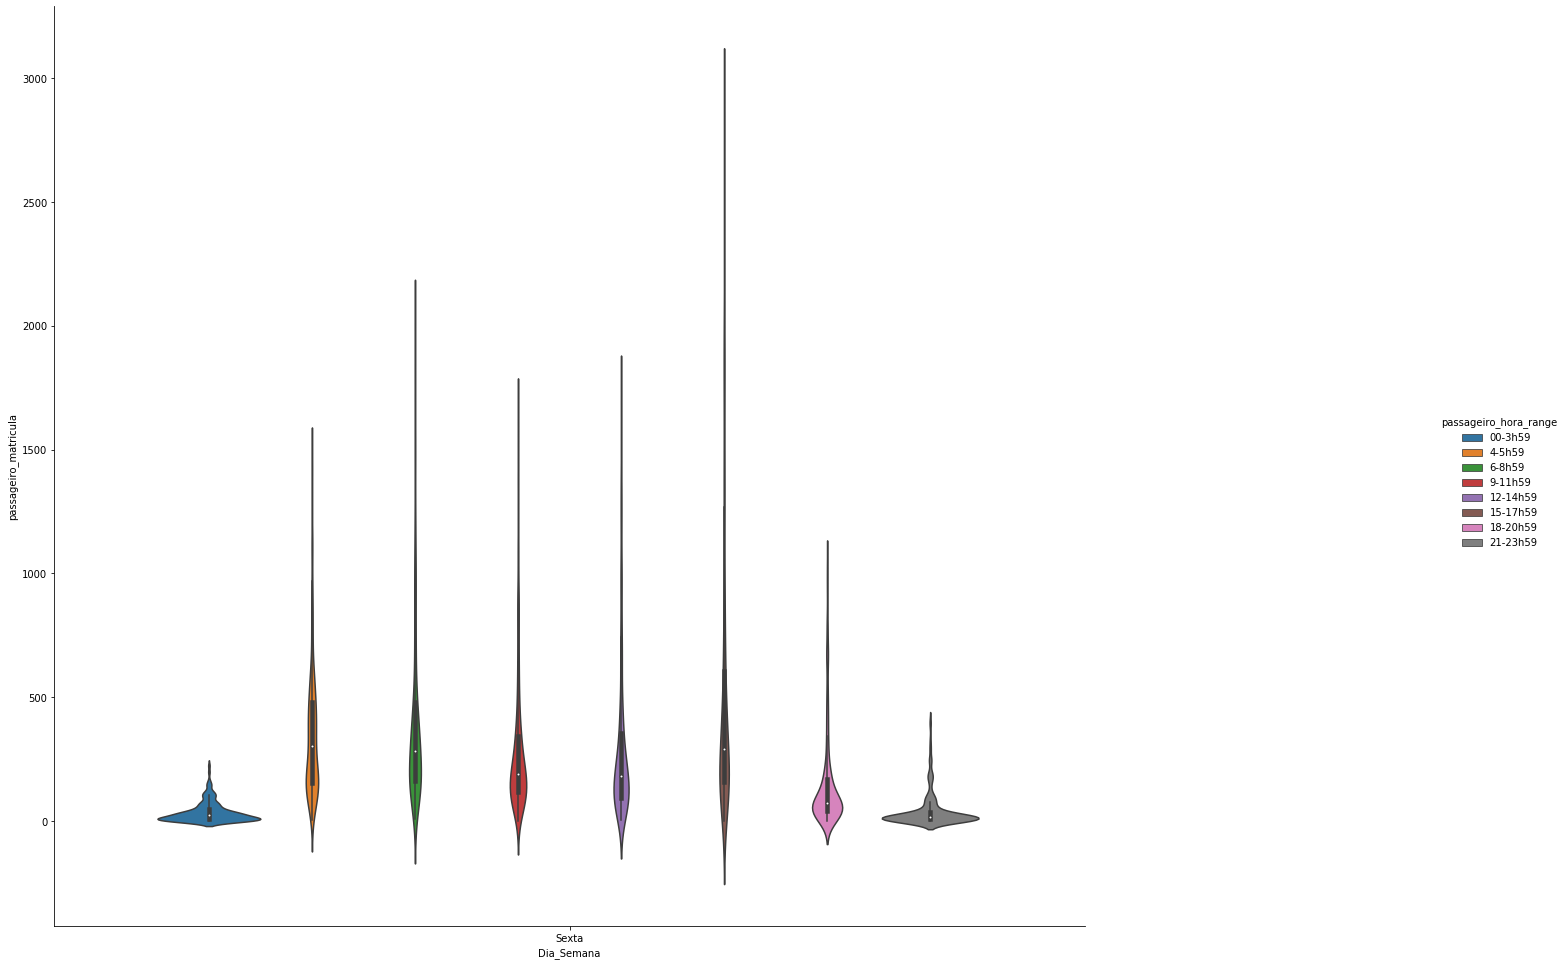

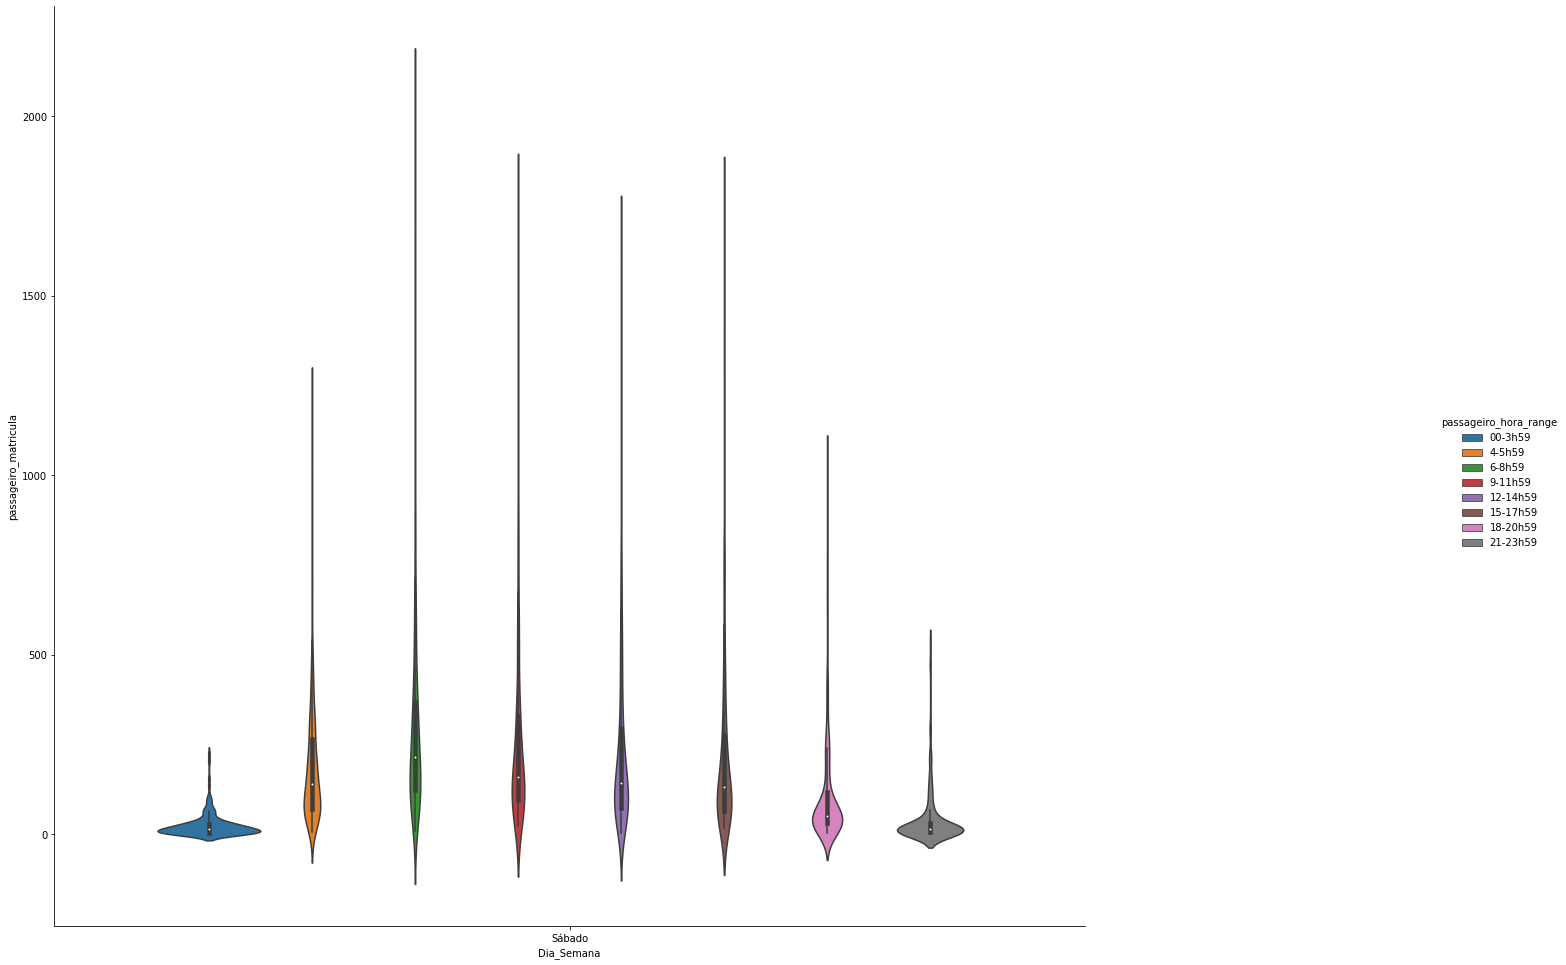

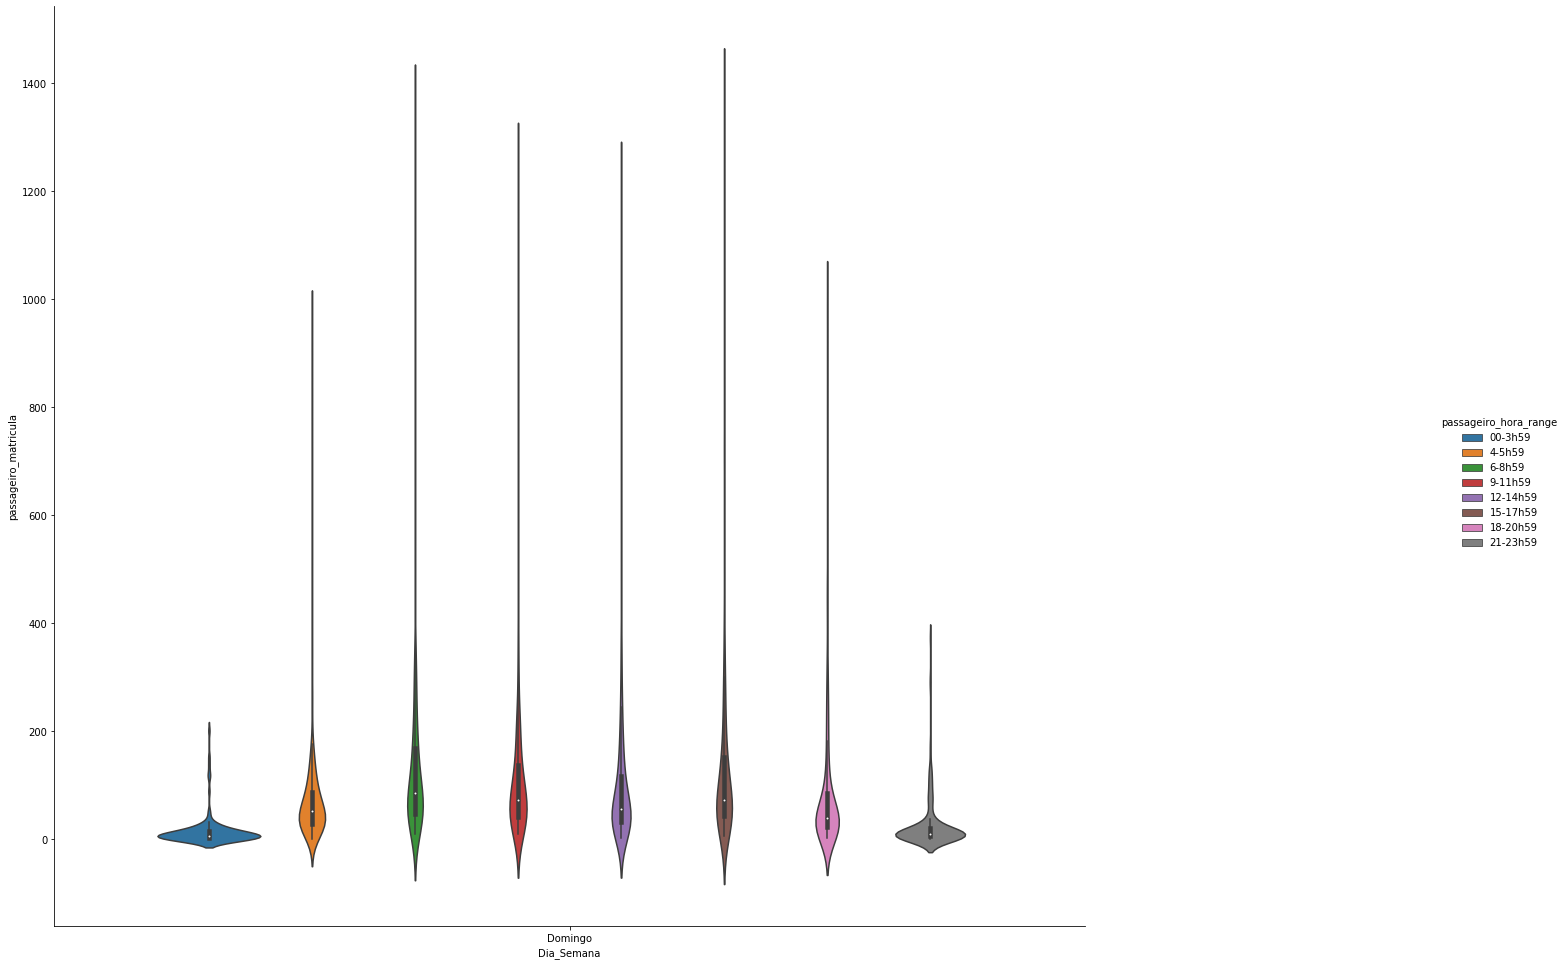

In [88]:
for i in days_week:
    dados = dataset_model[dataset_model["Dia_Semana"] == days_week[i]]
    ax = sb.catplot(x = "Dia_Semana", y = "passageiro_matricula", hue = "passageiro_hora_range", kind = "violin", data = dados)
    ax.fig.set_size_inches(25,15)

In [89]:
for i in days_week:
    print(days_week[i])

Segunda
Terça
Quarta
Quinta
Sexta
Sábado
Domingo
